In [16]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

import pandas as pd
import numpy as np
import nltk
import jieba #for tokenizing Chinese
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import collections
import random
import operator
import io
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


%matplotlib inline
pd.set_option('display.max_columns', 5400)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 3000)
plt.rcParams['font.family'] = ['SimHei']

url = '/Users/ypi/Desktop/news.csv'

news= pd.read_csv(url)

news.head(2)
news.columns=['order','url','date','title','text']
keepuseful=['date','text']
news=news.loc[:,keepuseful]
news.head(2)


,date,text
0,2020年11月12日新闻联播文字版,NaN
1,2020年12月15日新闻联播文字版,各位观众晚上好，今天是2020年12月15日，欢迎您收看今天的新闻联播节目，今天节目的主要内容有：\n习近平向人类减贫经验国际论坛致贺信央视网消息（新闻联播完整版）：人类减贫经验国际论坛12月14日在北京开幕。国家主席习近平向论坛致贺信。习近平指出，消除贫困是人类共同理想。中国共产党和中国政府始终把让人民过上好日子作为奋斗目标，为此进行了长期艰苦卓绝的努力。2012年以来，中国在之前扶贫攻坚的基础上，全面打响脱贫攻坚战。经过8年持续努力，今年中国现行标准下农村贫困人口已经全部脱贫，贫困县已经全部摘帽，近1亿农村贫困人口实现脱贫，为全球减贫事业作出重大贡献。中国将继续巩固和拓展脱贫攻坚成果，扎实推进共同富裕，不断提升民生福祉水平。习近平强调，当前，疫情仍在全球肆虐，减贫事业面临严峻挑战。中国愿同世界各国一道，携手推进国际减贫进程，推动构建人类命运共同体。希望论坛与会人士深化减贫经验交流，广泛凝聚共识，提振减贫信心，为加速全球减贫进程贡献智慧和力量。《求是》杂志发表习近平总书记重要文章《共担时代责任，共促全球发展》央视网消息（新闻联播完整版）：12月16日出版的第24期《求是》杂志...


In [17]:
news.describe()

,date,text
count,1937,1845
unique,1924,1845
top,2018年12月26日新闻联播文字完整版内容,《新闻联播》 20180201 19:00全国春运启动 预计29.8亿人次出行央视网消息（新闻联播文字版）：2018年春运从今天开始，至3月12日结束，为期40天，预计全国旅客发送量将达到29.8亿人次。重点车站从今天凌晨起加开春运临客。今天，预计全国铁路发送旅客814万人次。除北京地区之外、广州、武汉、西宁等地今天共增开旅客列车460列。春运期间，北京上海铁路部门在太原等地扩大“复兴号”开行范围，西成高铁、兰渝铁路、渝贵铁路等新线首次投入春运，加大了进出西南地区的运力供给。此外为提高出行体验，铁路部门增大智能化投入，升级互联网订餐系统，在杭州、郑州、合肥、济南、沈阳等火车站加大“刷脸”进站、智能导航等设备投入。今年春运期间，民航预计2月12、13号迎来出行最高峰，民航局安排近3万班春节包机，每天提供超过210万个座位。由交通运输部、全国总工会等五部委发起的情满旅途活动，以及团中央等六部门共同发起的 \n“暖冬行动”，今天同时启动。14万余名青年志愿者分批次上岗服务春运，在南方摩托大军返乡途中，中石化开通13辆免费“爱心大巴”。全国铁路公安机关全力组织开展专项行动，截至目前，全...
freq,2,1


In [18]:
news=news.astype('str')
news=news.dropna()
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 1936
Data columns (total 2 columns):
date    1937 non-null object
text    1937 non-null object
dtypes: object(2)
memory usage: 45.4+ KB


In [19]:
import re
import os,sys,string


def Date(text):
    
 text = text.replace("年", "-").replace("月", "-").replace("日", " ").replace("/", "-").strip()
 text = re.sub("\s+", " ", text)
 pattern = re.compile(r'[\u4e00-\u9fa5]')
 text = re.sub(pattern,'',text)

   

 return text

In [20]:
news['date']=news['date'].apply(Date)
news.head(2)

,date,text
0,2020-11-12,nan
1,2020-12-15,各位观众晚上好，今天是2020年12月15日，欢迎您收看今天的新闻联播节目，今天节目的主要内容有：\n习近平向人类减贫经验国际论坛致贺信央视网消息（新闻联播完整版）：人类减贫经验国际论坛12月14日在北京开幕。国家主席习近平向论坛致贺信。习近平指出，消除贫困是人类共同理想。中国共产党和中国政府始终把让人民过上好日子作为奋斗目标，为此进行了长期艰苦卓绝的努力。2012年以来，中国在之前扶贫攻坚的基础上，全面打响脱贫攻坚战。经过8年持续努力，今年中国现行标准下农村贫困人口已经全部脱贫，贫困县已经全部摘帽，近1亿农村贫困人口实现脱贫，为全球减贫事业作出重大贡献。中国将继续巩固和拓展脱贫攻坚成果，扎实推进共同富裕，不断提升民生福祉水平。习近平强调，当前，疫情仍在全球肆虐，减贫事业面临严峻挑战。中国愿同世界各国一道，携手推进国际减贫进程，推动构建人类命运共同体。希望论坛与会人士深化减贫经验交流，广泛凝聚共识，提振减贫信心，为加速全球减贫进程贡献智慧和力量。《求是》杂志发表习近平总书记重要文章《共担时代责任，共促全球发展》央视网消息（新闻联播完整版）：12月16日出版的第24期《求是》杂志...


In [21]:

news=pd.concat([news, news['date'].str.split('-', expand=True)], axis=1)
news.columns=['date','text','year','month','day']

In [22]:
import string

punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~、《【】》\,\n \t。“（）'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))

news['text'] = '|'.join(news['text'].tolist()).translate(transtab).split('|')

0


Text(0.5, 1.0, 'News Length')

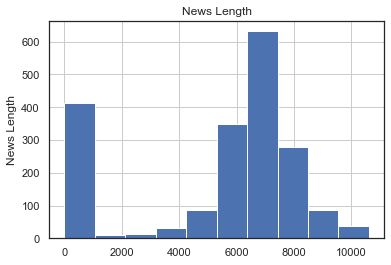

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import seaborn as sns
sns.set(style="white")
%matplotlib inline

def ChineseCharCount(str_str) :
    count = 0
    if str == type(str_str) :
        for str_tmp in str_str :
            if ord(str_tmp) - ord('0') >= 128 :
                count += 1
    return count
 
print(ChineseCharCount(2))

news['num_words'] = news['text'].apply(ChineseCharCount)
ax=news['num_words'].hist()

ax.set_ylabel('News Length')
ax.set_title('News Length')

In [24]:
news=news.sort_values(by=['year','month', 'day'])

In [25]:

keepyear=['2016','2017','2018','2018','2019','2020']
news=news[news['year'].isin(keepyear)]

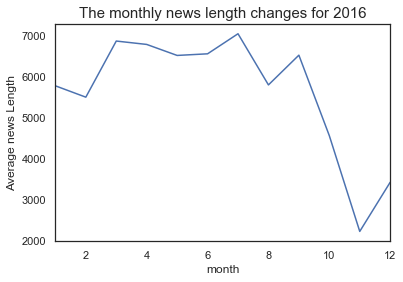

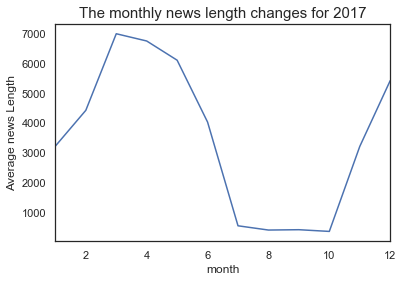

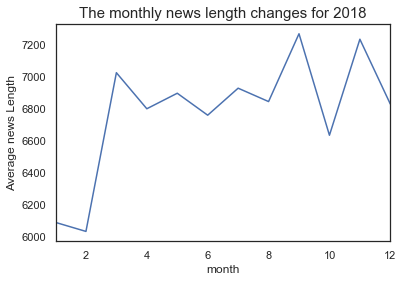

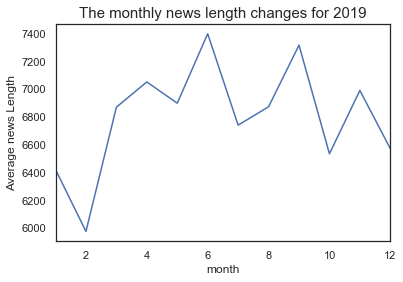

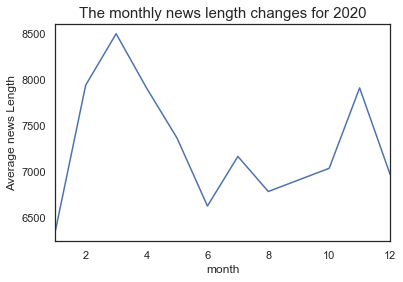

In [46]:
#The news length- how does the average news text change on a monthly and yearly basis;

news['month'] = pd.to_numeric(news['month'])
news['year'] = pd.to_numeric(news['year'])
year=[2016,2017,2018,2019,2020]

import matplotlib.pyplot as plt

for i in range(len(year)):
    
    df=news.loc[news['year'] == year[i]]
    ax= df.groupby('month')['num_words'].mean().plot()
    with plt.style.context('ggplot'):  
        ax.set_ylabel('Average news Length')
        plt.title('The monthly news length changes for {}'.format(year[i]),fontdict = {'fontsize' : 15})
        plt.show()
        
        
       




In [27]:
news = news[news.num_words > 50]
news.describe()

,year,month,num_words
count,1756.000000,1756.000000,1756.000000
mean,2017.763098,6.533030,5710.433371
std,1.376947,3.585749,2706.217820
min,2016.000000,1.000000,51.000000
25%,2017.000000,3.000000,5409.500000
50%,2018.000000,6.500000,6569.000000
75%,2019.000000,10.000000,7319.500000
max,2020.000000,12.000000,10609.000000


In [28]:
news.shape

(1756, 6)

In [29]:
stopwords = [line.strip() for line in io.open('/Users/ypi/Desktop/中文停用词表.txt', 'r', encoding='utf-8').readlines()]
        


news['cut'] = news['text'].apply(lambda x : [i for i in jieba.cut(x) if i not in stopwords])


news.head(2)

,date,text,year,month,day,num_words,cut
1307,2016-1-1,2016我们来了！世界各国多种形式喜迎2016年央视网消息新闻联播文字版：澳大利亚是全球最先迎来新年的国家之一，悉尼海港大桥的烟花表演已经是延续多年的跨年传统活动，今年的主题是多彩之城”十多万支造型别致新颖的烟花映亮悉尼夜空，现场上百万观众在欢呼声中迎来2016年韩国首尔市在普信阁举行新年敲钟仪式庆祝2016年到来按照传统，钟声要敲响三十三声，代表跨越黑暗”，祈愿国泰民安今年参加敲钟仪式的市民代表，包括了2015年在抗击中东呼吸综合征疫情中作出突出贡献的医务人员新年第一刻，聚集在法国巴黎香榭丽舍大街的人群发出巨大的欢呼声出于安全因素以及对恐袭遇难者的尊重，今年巴黎市政府取消了燃放烟花等环节，缩小迎新年活动规模，并出动了上万名警察和安保人员一些民众表示，他们如常来参加新年活动，就是为了显示不会向恐怖主义低头，并祝福新年会更好2016年南美国家巴西将迎来四年一度的夏季奥运会今年里约热内卢科帕卡巴纳海滩”的跨年庆祝活动主题就是奥运之城·桑巴百年”在壮观的海上焰火表演中，超过200万人共同迎来了2016年除了我们所生活的地球，远在太空的三名国际空间站宇航员也送上了2016年的新年祝福国...,2016,1,1,5617,"[2016, 世界, 各国, 多种形式, 喜迎, 2016, 澳大利亚, 全球, 最先, 迎来, 新年, 国家, 悉尼, 海港, 大桥, 烟花, 表演, 延续, 多年, 跨, 传统, 活动, 主题, 多彩, 城, 十多万, 支, 造型, 别致, 新颖, 烟花, 映亮, 悉尼, 夜空, 现场, 上百万, 观众, 欢呼声, 迎来, 2016, 韩国, 首尔, 市, 普信阁, 举行, 新年, 敲钟, 仪式, 庆祝, 2016, 到来, 传统, 钟声, 敲响, 三十三, 声, 代表, 跨越, 黑暗, 祈愿, 国泰民安, 参加, 敲钟, 仪式, 市民, 代表, 包括, 2015, 抗击, 中东, 呼吸, 综合征, 疫情, 作出, 突出贡献, 医务人员, 新年, 第一, 刻, 聚集, 法国巴黎, 香榭丽舍大街, 人群, 发出, 巨大, 欢呼声, 安全, 因素, 恐袭, 遇难者, 尊重, 巴黎市政府, 取消, 燃放烟花, 环节, 缩小, 迎新年, 活动, 规模, 出动, ...]"
978,2016-1-12,国际联播快讯阿富汗问题四方机制会议发表声明11号，由巴基斯坦阿富汗中国美国参与的阿富汗问题四方机制会议发表联合声明，呼吁阿富汗政府与塔利班立即展开和平对话声明说，与会各方通过了四方机制对话相关工作条款，决定今后定期举行对话声明同时宣布将于1月18号在阿富汗首都喀布尔召开第二轮对话，讨论阿富汗和平进程路线图问题缅甸开启全国和平政治对话缅甸联邦和平会议今天在首都内比都召开，标志着缅甸首轮全国和平政治对话启动缅甸总统吴登盛等政府官员全国民主联盟主席昂山素季和十支少数民族武装领导人及多个国家和组织的观察员参会本轮对话预计持续5天，议题包括政治经济社会安全及土地与自然资源缅甸自1948年独立以来，境内一直存在大小数十支少数民族武装去年10月15号，缅甸政府与8支少数民族武装领导人签署了全国停火协议西班牙公主因涉腐案出庭受审11号，西班牙公主克里斯蒂娜因涉嫌贪腐案出庭受审这是西班牙王室成员首次出现在被告席上克里斯蒂娜是西班牙国王费利佩六世的姐姐，因受丈夫乌丹加林侵占公款案的牵连而被控两项协助逃税罪如果罪名成立，克里斯蒂娜最高可被判八年监禁因担心影响王室形象，西班牙国王费利佩六世已经剥夺了克...,2016,1,12,6941,"[国际, 快讯, 阿富汗, 问题, 四方, 机制, 发表声明, 11, 号, 巴基斯坦, 阿富汗, 中国, 美国, 参与, 阿富汗, 问题, 四方, 机制, 发表, 联合声明, 呼吁, 阿富汗, 政府, 塔利班, 立即, 展开, 和平, 对话, 声明, 说, 与会, 各方, 四方, 机制, 对话, 相关, 工作, 条款, 决定, 今后, 定期, 举行, 对话, 声明, 宣布, 18, 号, 阿富汗, 首都, 喀布尔, 第二轮, 对话, 讨论, 阿富汗, 和平, 进程, 路线图, 问题, 缅甸, 开启, 全国, 和平, 政治, 对话, 缅甸联邦, 和平, 首都, 内比, 标志, 缅甸, 首轮, 全国, 和平, 政治, 对话, 启动, 缅甸, 总统, 吴登盛, 政府, 官员, 全国, 民主联盟, 主席, 昂山, 素季, 十支, 少数民族, 武装, 领导人, 多个, 国家, 组织, 观察员, 参会, 本轮, 对话, 预计, 持续, 天, ...]"


2016
[('发展', 6766),
 ('中国', 5876),
 ('习近平', 3970),
 ('合作', 3938),
 ('国家', 3485),
 ('工作', 3228),
 ('号', 2758),
 ('经济', 2590),
 ('建设', 2535),
 ('改革', 2494),
 ('创新', 2310),
 ('全面', 2184),
 ('问题', 2129),
 ('加强', 2104),
 ('推进', 2062),
 ('推动', 1954),
 ('主席', 1943),
 ('我国', 1918),
 ('全国', 1904),
 ('国际', 1896),
 ('重要', 1838),
 ('企业', 1815),
 ('进行', 1742),
 ('李克强', 1720),
 ('实现', 1616),
 ('地区', 1583),
 ('领域', 1575),
 ('关系', 1543),
 ('组织', 1531),
 ('说', 1494)]


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



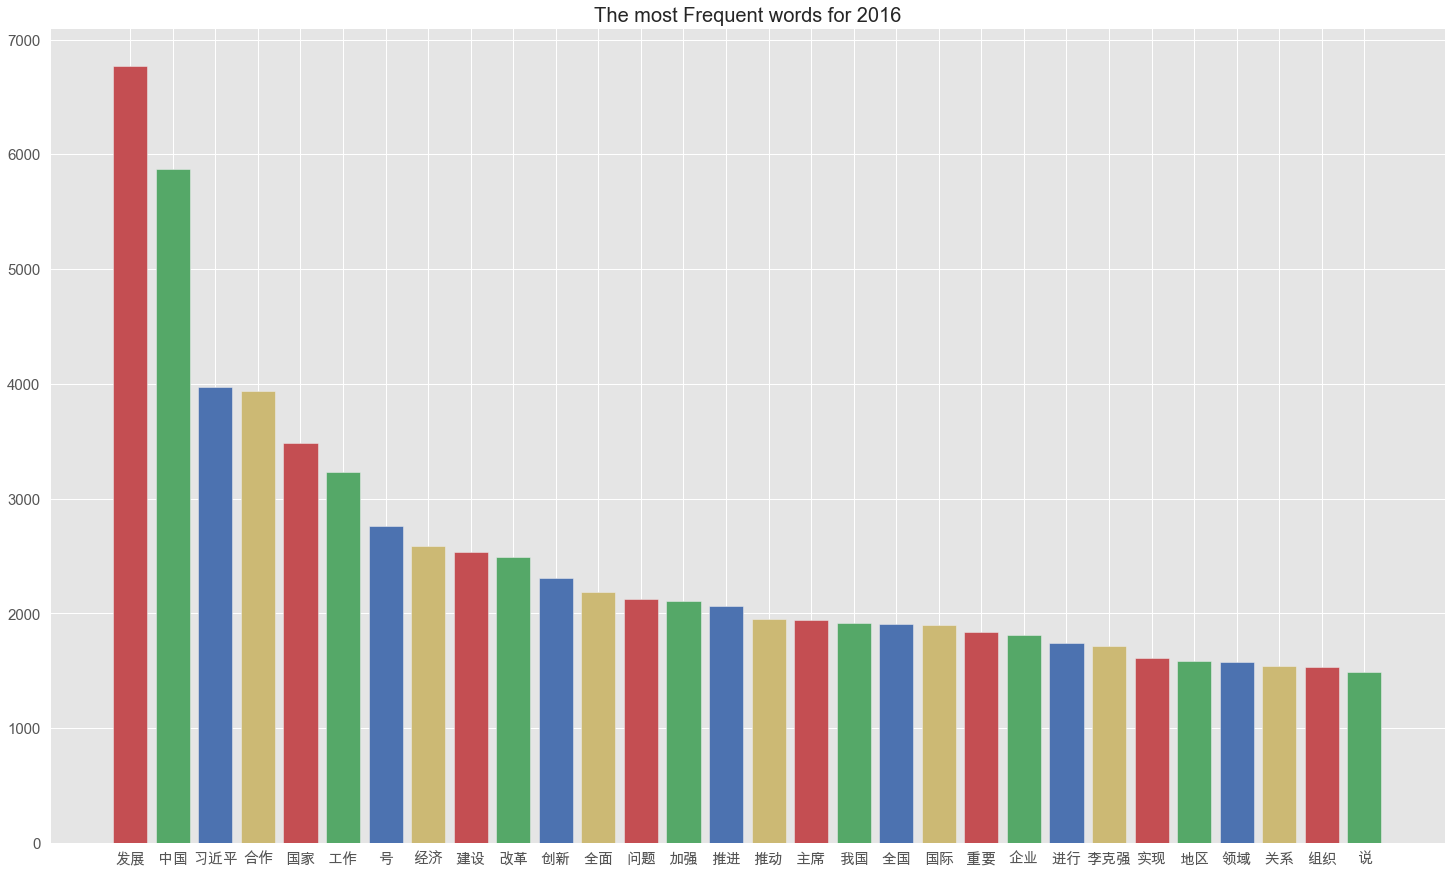

2017
[('中国', 3626),
 ('发展', 3615),
 ('习近平', 2848),
 ('合作', 2291),
 ('国家', 1993),
 ('工作', 1932),
 ('建设', 1533),
 ('经济', 1444),
 ('国际', 1439),
 ('问题', 1340),
 ('全国', 1293),
 ('总统', 1287),
 ('·', 1277),
 ('推进', 1248),
 ('我国', 1207),
 ('主席', 1207),
 ('改革', 1200),
 ('举行', 1173),
 ('推动', 1093),
 ('加强', 1090),
 ('进行', 1088),
 ('李克强', 1060),
 ('全面', 1027),
 ('组织', 1002),
 ('美国', 994),
 ('重要', 950),
 ('世界', 930),
 ('—', 912),
 ('号', 906),
 ('实现', 892)]


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



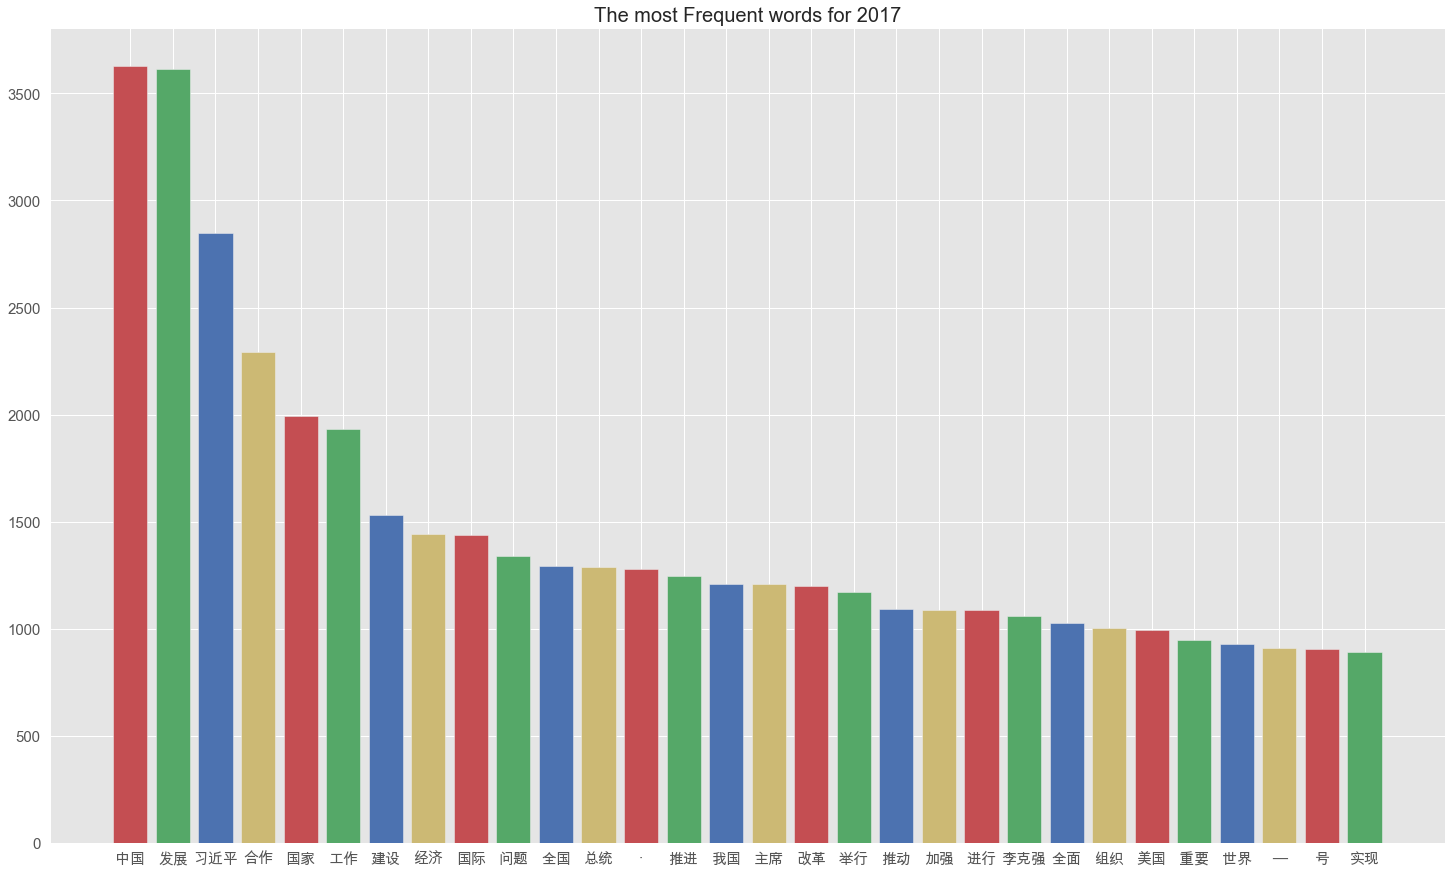

2018
[('中国', 8228),
 ('发展', 7938),
 ('习近平', 6514),
 ('合作', 4360),
 ('国家', 4180),
 ('工作', 3359),
 ('建设', 3097),
 ('主席', 2998),
 ('经济', 2872),
 ('时代', 2630),
 ('推动', 2528),
 ('国际', 2452),
 ('—', 2352),
 ('全面', 2197),
 ('我国', 2192),
 ('加强', 2166),
 ('问题', 2092),
 ('全国', 2066),
 ('推进', 2012),
 ('企业', 1982),
 ('重要', 1974),
 ('美国', 1972),
 ('坚持', 1904),
 ('改革', 1884),
 ('创新', 1874),
 ('进行', 1855),
 ('人民', 1845),
 ('实现', 1824),
 ('世界', 1787),
 ('总书记', 1757)]


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



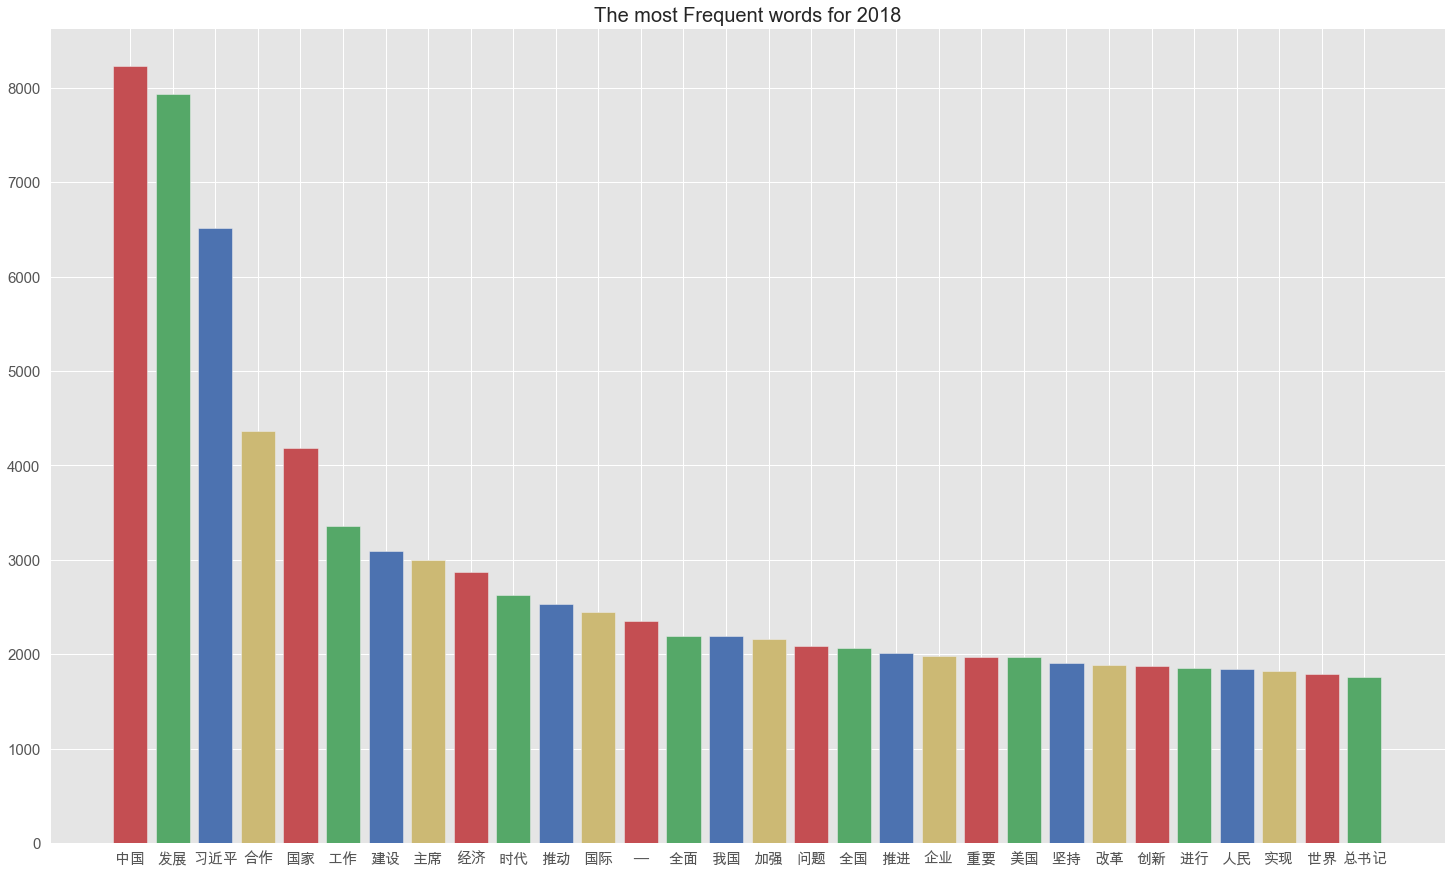

2019
[('中国', 8804),
 ('发展', 7026),
 ('习近平', 5388),
 ('国家', 4009),
 ('工作', 3556),
 ('合作', 3168),
 ('国际', 2699),
 ('经济', 2616),
 ('主席', 2569),
 ('美国', 2519),
 ('建设', 2462),
 ('推动', 2288),
 ('问题', 2276),
 ('—', 2269),
 ('时代', 2156),
 ('香港', 2118),
 ('全国', 2040),
 ('企业', 1977),
 ('重要', 1878),
 ('总书记', 1850),
 ('加强', 1806),
 ('推进', 1802),
 ('人民', 1798),
 ('世界', 1777),
 ('全面', 1741),
 ('坚持', 1722),
 ('进行', 1695),
 ('我国', 1683),
 ('实现', 1643),
 ('中央', 1626)]


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



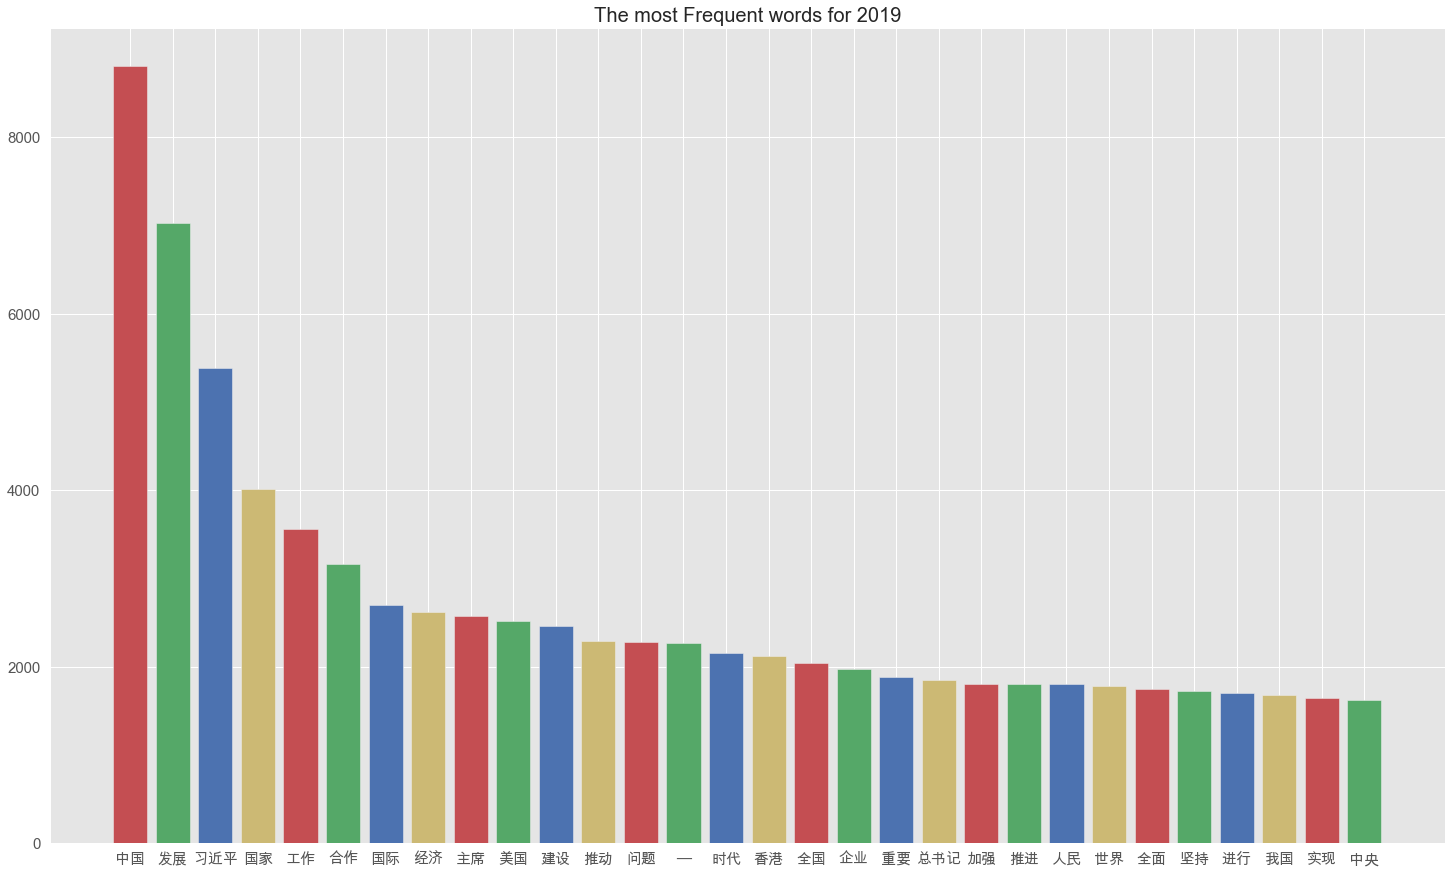

2020
[('疫情', 6574),
 ('中国', 4283),
 ('发展', 3753),
 ('病例', 3666),
 ('国家', 3410),
 ('工作', 3297),
 ('防控', 2993),
 ('习近平', 2933),
 ('美国', 2493),
 ('确诊', 2287),
 ('企业', 2179),
 ('肺炎', 2176),
 ('新冠', 2147),
 ('完整版', 1968),
 ('国际', 1911),
 ('全国', 1874),
 ('经济', 1756),
 ('—', 1670),
 ('人民', 1636),
 ('建设', 1631),
 ('全球', 1538),
 ('新增', 1509),
 ('我国', 1486),
 ('全面', 1451),
 ('合作', 1451),
 ('时', 1414),
 ('累计', 1411),
 ('推动', 1390),
 ('加强', 1379),
 ('总书记', 1336)]


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



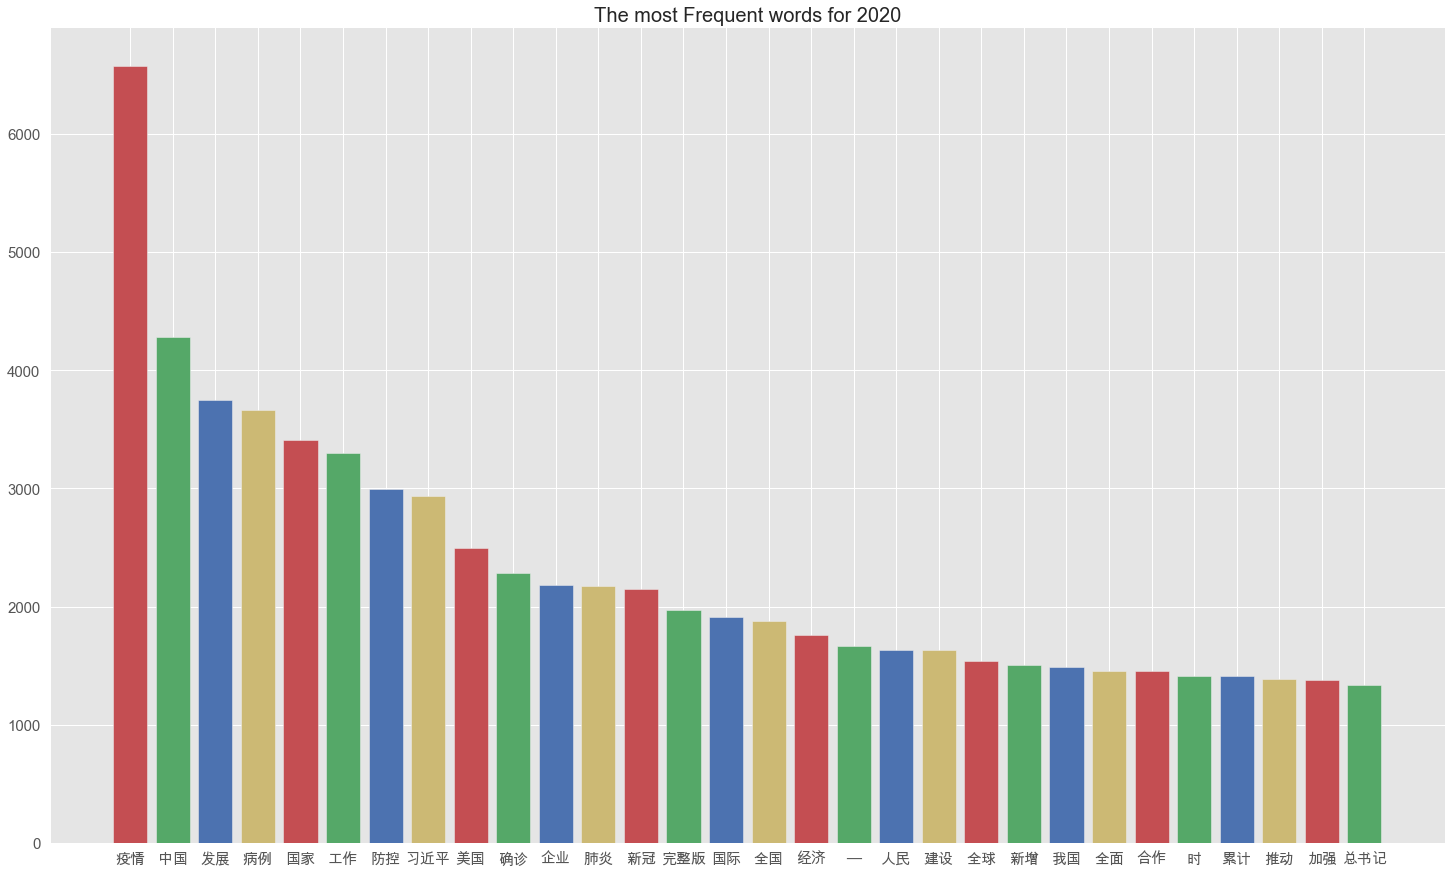

In [43]:
#The hot words- what are the most frequent words for each year and for all years; 
year=[2016,2017,2018,2019,2020]

from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns


for i in range(len(year)):
    words = []
    df = pd.DataFrame()
    df=news.loc[news['year'] == year[i]]
    for word in df['cut']:
        words.extend(word)
    counter = Counter(words)
    print(year[i])
    pprint(counter.most_common(30))
        
    common_token=[word[0] for word in counter.most_common(30)]
    common_token_count=[word[1] for word in counter.most_common(30)]
    common_tokens_df=pd.DataFrame({'Tokens':common_token,'Count':common_token_count})
    with plt.style.context('ggplot'):  
        plt.figure(figsize=[25, 15]) 
        plt.bar(range(len(common_token)), common_token_count,color='rgby',tick_label=common_token)
        plt.tick_params(labelsize=15)
        plt.rcParams['font.sans-serif']=['Arial Unicode MS']
        plt.rcParams['axes.unicode_minus']=False
        plt.title('The most Frequent words for {}'.format(year[i]),fontdict = {'fontsize' : 20})


        plt.show()

[('中国', 30817),
 ('发展', 29098),
 ('习近平', 21653),
 ('国家', 17077),
 ('工作', 15372),
 ('合作', 15208),
 ('经济', 11278),
 ('建设', 11258),
 ('国际', 10397),
 ('主席', 9831),
 ('推动', 9253),
 ('全国', 9177),
 ('美国', 9009),
 ('问题', 8889),
 ('企业', 8774),
 ('全面', 8600),
 ('加强', 8545),
 ('我国', 8486),
 ('推进', 8364),
 ('—', 8249),
 ('重要', 7872),
 ('改革', 7708),
 ('进行', 7485),
 ('创新', 7320),
 ('人民', 7289),
 ('实现', 7127),
 ('总书记', 6954),
 ('坚持', 6906),
 ('世界', 6777),
 ('疫情', 6754)]


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



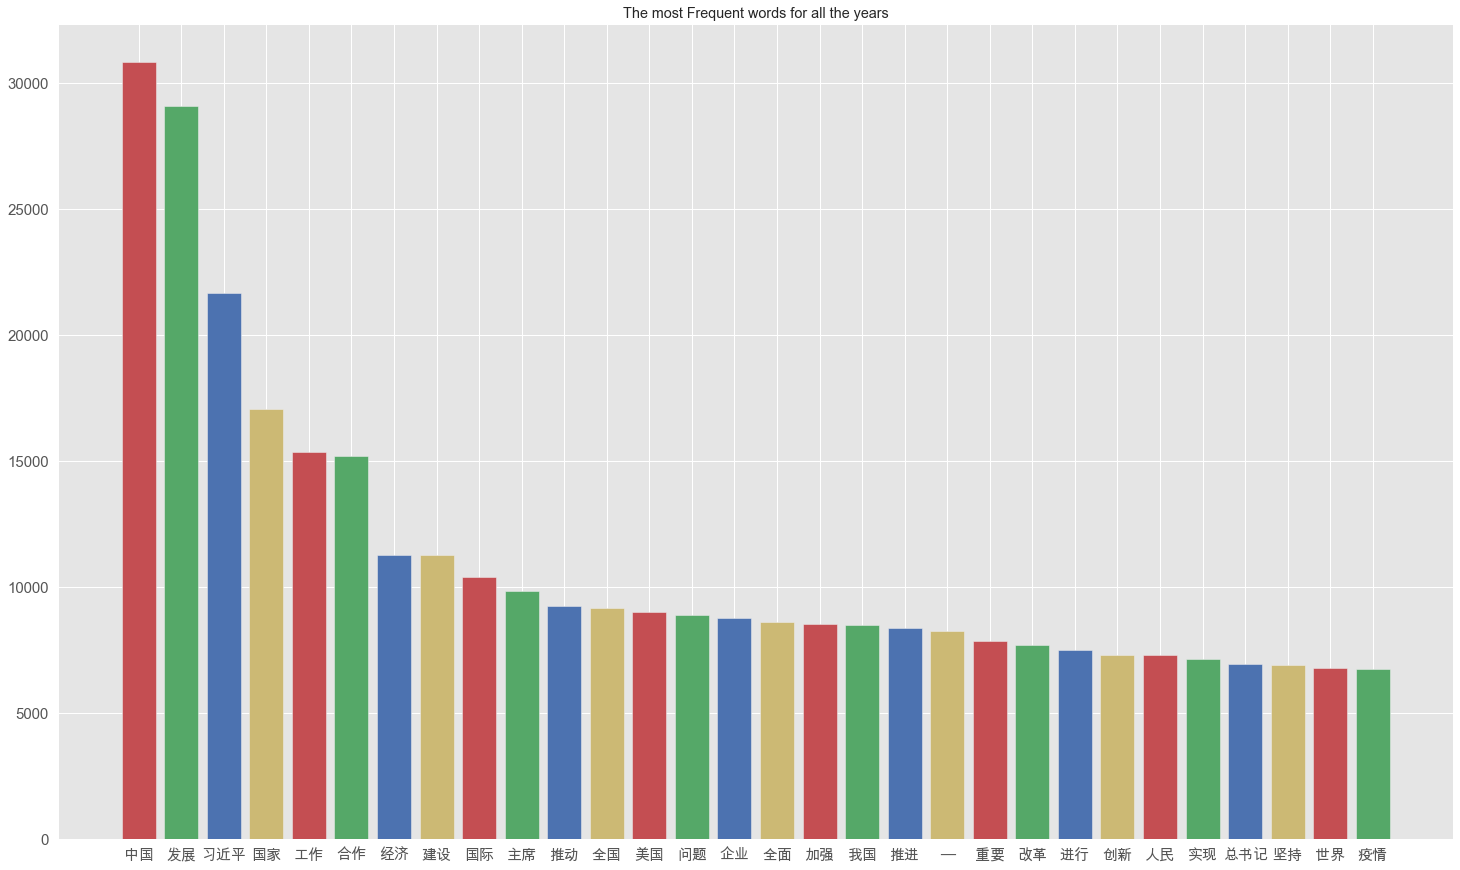

In [48]:
#The hot words- what are the most frequent words for each year and for all years; 

# all the year 

words = []

for word in news['cut']:
    words.extend(word)
    
words

from collections import Counter
from pprint import pprint


counter = Counter(words)

pprint(counter.most_common(30))

common_token=[word[0] for word in counter.most_common(30)]
common_token_count=[word[1] for word in counter.most_common(30)]
common_tokens_df=pd.DataFrame({'Tokens':common_token,'Count':common_token_count})

import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
with plt.style.context('ggplot'):  

    plt.figure(figsize=[25, 15])
    plt.bar(range(len(common_token)), common_token_count,color='rgby',tick_label=common_token)
    plt.title('The most Frequent words for all the years')
    plt.tick_params(labelsize=15)
    plt.show()

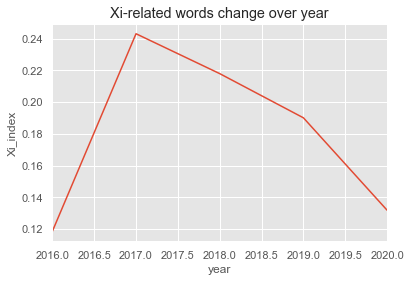

In [49]:
# The Xi index- how does frequency of Xi-related words change over year;
def process_words(x):
    
    stop_words = [line.strip() for line in io.open('/Users/ypi/Desktop/中文停用词表.txt', 'r', encoding='utf-8').readlines()]
        
    seg = jieba.cut(x, cut_all=False) 
        
        
    text_split_no = []
    
    for words in seg: 
             if words not in stop_words: 
             
                  text_split_no.append(words)
                   
                   

 
    return ','.join(text_split_no)



news['tokenized']=news['text'].apply(process_words)
news.head(2)

def create_xi_count(row):
    xi_names = ['习近平', '习主席', '习书记', '习总书记']
    return 100 *  ((row.count(xi_names[0])/len(row)) + 
                  (row.count(xi_names[1])/len(row)) +
                  (row.count(xi_names[2])/len(row)) +
                  (row.count(xi_names[3])/len(row))) 

news['xi_count'] = news['tokenized'].apply(create_xi_count)






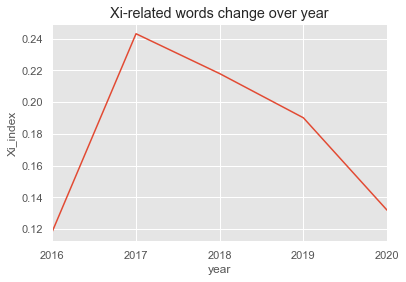

In [51]:
with plt.style.context('ggplot'):  
    ax= news.groupby('year')['xi_count'].mean().plot()
    ax.set_ylabel('Xi_index')
    plt.title('Xi-related words change over year')
    ax.xaxis.set_ticks(np.arange(2016, 2021, 1))
    plt.show()
    

In [52]:
# start to build LDA model 
import gensim

texts_list=[]
for item in news['cut']:
    words=[word for word in item]
    texts_list.append(words)

    
dictionary=gensim.corpora.Dictionary(texts_list)
corpus = [dictionary.doc2bow(doc) for doc in texts_list]

# human readable format of corpus
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('10', 1),
  ('1000', 2),
  ('101', 1),
  ('11', 2),
  ('12', 1),
  ('153', 1),
  ('16', 2),
  ('200', 2),
  ('2012', 1),
  ('2014', 1),
  ('2015', 10),
  ('2016', 12),
  ('2020', 1),
  ('27', 1),
  ('29', 1),
  ('30', 1),
  ('3000', 1),
  ('31', 1),
  ('40', 1),
  ('415', 1),
  ('600', 1),
  ('86', 1),
  ('·', 1),
  ('‘', 1),
  ('’', 1),
  ('一书', 1),
  ('一体', 1),
  ('一倍', 1),
  ('一场', 1),
  ('一年', 7),
  ('一度', 1),
  ('一张', 1),
  ('一支', 3),
  ('一百年', 1),
  ('一种', 1),
  ('一系列', 4),
  ('一致', 1),
  ('七项', 1),
  ('万', 3),
  ('万人', 1),
  ('三严', 3),
  ('三个', 1),
  ('三个代表', 1),
  ('三中', 1),
  ('三十三', 1),
  ('三名', 1),
  ('三实', 3),
  ('三张', 1),
  ('上万名', 1),
  ('上百万', 1),
  ('上要', 1),
  ('上阵', 1),
  ('下午', 1),
  ('下发', 1),
  ('不仅仅', 1),
  ('不会', 1),
  ('不减', 1),
  ('不可', 1),
  ('不断', 1),
  ('不朽', 1),
  ('不竭', 1),
  ('专项', 1),
  ('专题', 3),
  ('世界', 4),
  ('两个', 1),
  ('两岸', 1),
  ('两年', 1),
  ('严', 1),
  ('严明', 7),
  ('中东', 1),
  ('中共', 1),
  ('中共中央', 2),
  ('中共中央政治局', 2),
  ('中共中央文献研究室', 1),


In [54]:
# Find the best topic number 

num_topics = list(range(30)[1:])
num_keywords = 20

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]
    

def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [55]:
import numpy as np
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [58]:
from gensim.models import CoherenceModel
coherences = [CoherenceModel(model=LDA_models[i], texts=texts_list, dictionary= dictionary, coherence='c_v').get_coherence() for i in num_topics[:-1]] 

In [60]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_diffs
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]

In [61]:
coh_sta_max_idxs
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

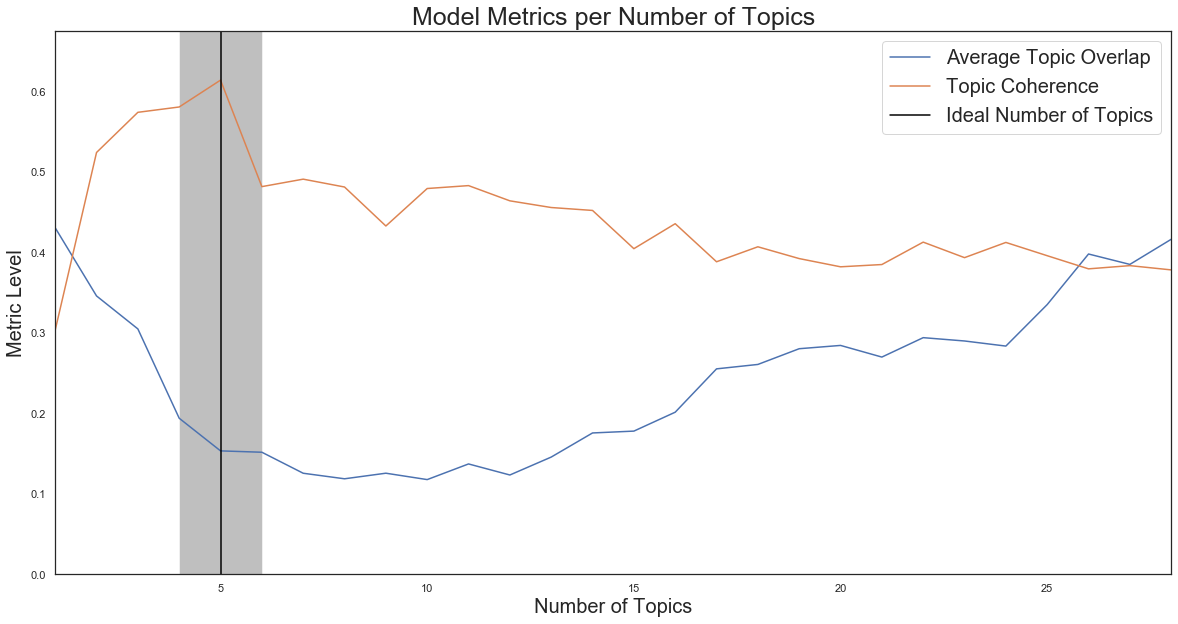

In [62]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show() 

In [63]:
lda_train4 = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus,
                           num_topics=5,
                           id2word=dictionary,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)

In [65]:
lda_train4.print_topics(20,num_words=15)

[(0,
  '0.006*"号" + 0.004*"改革" + 0.003*"发展" + 0.003*"叙利亚" + 0.003*"中国" + 0.003*"我国" + 0.003*"问题" + 0.003*"进行" + 0.002*"工作" + 0.002*"2016" + 0.002*"全国" + 0.002*"创新" + 0.002*"组织" + 0.002*"国家" + 0.002*"政府"'),
 (1,
  '0.007*"疫情" + 0.006*"中国" + 0.004*"美国" + 0.004*"病例" + 0.004*"企业" + 0.003*"国家" + 0.003*"防控" + 0.003*"全国" + 0.003*"工作" + 0.003*"发展" + 0.002*"国际" + 0.002*"—" + 0.002*"确诊" + 0.002*"肺炎" + 0.002*"新冠"'),
 (2,
  '0.009*"发展" + 0.008*"工作" + 0.007*"中国" + 0.007*"习近平" + 0.005*"国家" + 0.005*"建设" + 0.004*"坚持" + 0.004*"经济" + 0.004*"全面" + 0.004*"问题" + 0.003*"时代" + 0.003*"党" + 0.003*"总书记" + 0.003*"改革" + 0.003*"中央"'),
 (3,
  '0.014*"中国" + 0.013*"发展" + 0.013*"合作" + 0.011*"习近平" + 0.006*"国家" + 0.006*"主席" + 0.005*"推动" + 0.005*"国际" + 0.004*"关系" + 0.004*"中方" + 0.004*"共同" + 0.004*"经济" + 0.004*"加强" + 0.004*"世界" + 0.004*"总统"'),
 (4,
  '0.009*"审议" + 0.007*"发展" + 0.007*"草案" + 0.007*"代表" + 0.006*"报告" + 0.006*"工作" + 0.006*"委员" + 0.006*"中国" + 0.005*"全国人大常委会" + 0.005*"全国人大" + 0.005*"习近平" + 0.004*"十二届" + 0.004*"代

In [66]:
for i in range(len(news)):
    top_topics = lda_train4.get_document_topics(corpus, minimum_probability=0.0)

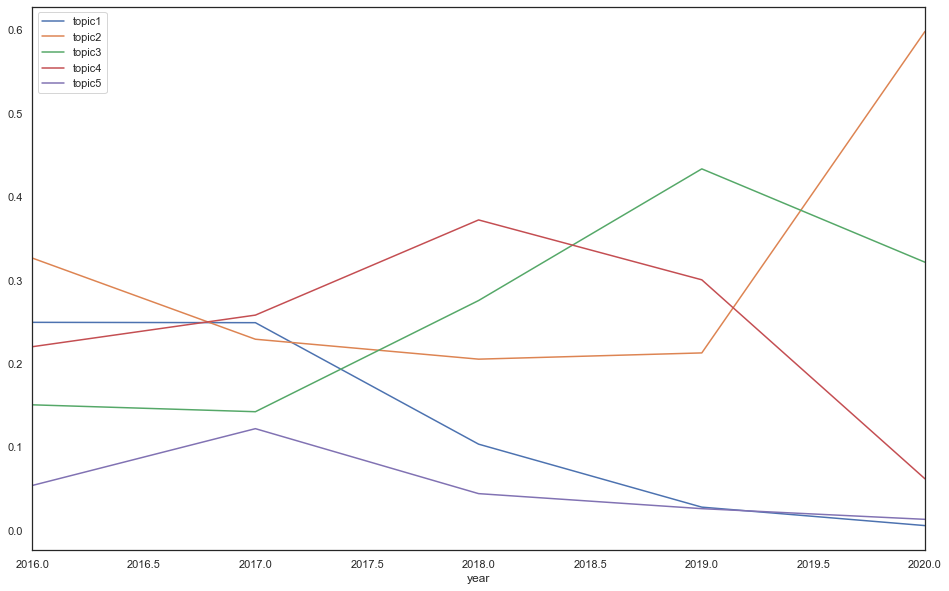

In [67]:
x=np.array(top_topics)
news['topic1']=x[:,0,1]
news['topic2']=x[:,1,1]
news['topic3']=x[:,2,1]
news['topic4']=x[:,3,1]
news['topic5']=x[:,4,1]

fig, ax = plt.subplots(1,1,figsize=(16, 10))
news.groupby('year')['topic1'].mean().plot()
news.groupby('year')['topic2'].mean().plot()
news.groupby('year')['topic3'].mean().plot()
news.groupby('year')['topic4'].mean().plot()
news.groupby('year')['topic5'].mean().plot()

plt.legend()

In [76]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
stop_words=stopwords = [line.strip() for line in io.open('/Users/ypi/Desktop/中文停用词表.txt', 'r', encoding='utf-8').readlines()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_train4.show_topics(5,formatted=False,num_words=30)
topics

[(0,
  [('号', 0.0058087967),
   ('改革', 0.004233057),
   ('发展', 0.0034467897),
   ('叙利亚', 0.0032602279),
   ('中国', 0.0030968501),
   ('我国', 0.0030570833),
   ('问题', 0.0027135524),
   ('进行', 0.002608856),
   ('工作', 0.00243366),
   ('2016', 0.0024023969),
   ('全国', 0.002392851),
   ('创新', 0.0022557527),
   ('组织', 0.0021582781),
   ('国家', 0.0021191277),
   ('政府', 0.002080916),
   ('建设', 0.002011606),
   ('全面', 0.0020071734),
   ('•', 0.0019562223),
   ('说', 0.0019308539),
   ('企业', 0.0018705296),
   ('推进', 0.0018403301),
   ('总统', 0.0018137395),
   ('经济', 0.0017848889),
   ('举行', 0.0017189726),
   ('2015', 0.0016635027),
   ('地区', 0.001625849),
   ('极端', 0.0016228493),
   ('2017', 0.0015435395),
   ('快讯', 0.0015349978),
   ('实现', 0.0014481863)]),
 (1,
  [('疫情', 0.0068190005),
   ('中国', 0.0062298584),
   ('美国', 0.0038642157),
   ('病例', 0.0035277272),
   ('企业', 0.0035274802),
   ('国家', 0.003412052),
   ('防控', 0.00309993),
   ('全国', 0.0030045516),
   ('工作', 0.0026442222),
   ('发展', 0.00254384

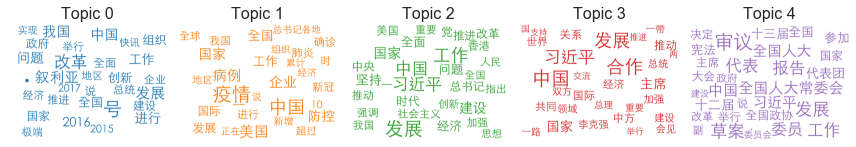

In [77]:
# wordclouds for each model
fig, axes = plt.subplots(1, 5, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()